## Pueba 2 

**Oscar Pizarro**


In [266]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np
%matplotlib inline

url = 'Casos covid por provincias.xlsx'
df = pd.read_excel(url)
SD= df[df['Provincia'] == "Santo Domingo"]
casos= SD.iloc[0].loc["16/3/2020":]
np.mean(casos)

CAMASHGSD = 73
CAMASHIEESD = 100
PERSONALHGSD = 25
PERSONALHIEESD = 56
EQUIPOSHGSD = 35 
EQUIPOSIESSD = 64 
INFECTADOS = 100
CRECIMIENTO = int(np.mean(casos))*3
DIAS_INTERNADO = 10
DA_PERSONAL = 10
D_EQUIPO = 6
DIAS_SIMULACION = 100
COSTO_ATENCION = 850


#******************HOMBRES
HOMBRES={}
HOMBREST={}
HOMBREST={}
#menor
ADULTOSSMM={}
NEUMOMM={}
INTENMM={}
RECUPERADOMM={}
FALLECIDOSMM={}
#joven
ADULTOSSJM={}
NEUMOMJ={}
INTENMJ={}
RECUPERADOMJ={}
FALLECIDOSMJ={}
#teredad
ADULTOSSTM={}
NEUMOMT={}
INTENMT={}
RECUPERADOMT={}
FALLECIDOSMT={}

#****************MUJERES
MUJERES={}
MUJEREST={}
#menor
ADULTOSSMF={}
NEUMOFM={}
INTENFM={}
RECUPERADOFM={}
FALLECIDOSFM={}
#joven
ADULTOSSJF={}
NEUMOFJ={}
INTENFJ={}
RECUPERADOFJ={}
FALLECIDOSFJ={}
#teredad
ADULTOSSTF={}
NEUMOFT={}
INTENFT={}
RECUPERADOFT={}
FALLECIDOSFT={}

PACIENTES_E=[]
PACIENTES_C=[]
PACIENTES_P=[]

class Hospital(object):
    #constructor
    def __init__(self, env, num_cama,num_personal,num_equipos, name):
            self.env = env
            self.num_cama = num_cama
            self.num_personal=num_personal
            self.num_equipos=num_equipos
            self.camas = simpy.Resource(env, num_cama)
            self.personal = simpy.Resource(env, num_personal)
            self.equipos = simpy.Resource(env, num_equipos)
            self.name = name
            
    def ingresar_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))

    def uso_personal_paciente(self, paciente):
        yield self.env.timeout(random.randint(DA_PERSONAL-3, DA_PERSONAL+3))
        
    def uso_equipo_paciente(self, paciente):
        yield self.env.timeout(random.randint(D_EQUIPO-1, D_EQUIPO+1))
       
def llegada_paciente(evn, hospital, paciente):
    sintoma=0
    arrive = evn.now
    gpaciente = np.random.randint(1,101)
    edadpac= np.random.randint(1,101)
    if(edadpac <= 21 and edadpac >= 0 ):
        
        if (gpaciente <= 55):
            
            print("Pacinete Femenino menor de edad")
            MUJERES[env.now] = MUJERES[env.now] + 1 if env.now in MUJERES else  1
            MUJEREST[env.now] = MUJEREST[env.now] + 1 if env.now in MUJEREST else  1
            sintoma= np.random.randint(1,101)
            # ****************** SINTOMAS
            if (sintoma <= 5):
                print("Paciente menor de edad femenino con sintomas leves")
                ADULTOSSMF[env.now] = ADULTOSSMF[env.now] + 1 if env.now in ADULTOSSMF else  1
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimiento:
                        yield env.process(hospital.ingresar_paciente(paciente))
                        arrive2 = env.now
                        PACIENTES_C.append(1)
                        neumonia =np.random.randint(1,101)
                        # ****************** NEUMONIA 
                        if (neumonia <= 75):
                            NEUMOFM[env.now] = NEUMOFM[env.now] + 1 if env.now in NEUMOFM else  1
                            print("Paciente menor de edad femenino con neumonia")
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimiento2:
                                    yield env.process(hospital.uso_personal_paciente(paciente))
                                    arrive3 = env.now
                                    PACIENTES_P.append(1)
                                    with hospital.equipos.request() as equipo:
                                        dias_esperando_equipo = random.randint(1,2)
                                        requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                        wait3 = env.now - arrive3
                                        intensivos =np.random.randint(1,101)
                                        # ****************** CUIDADOS INTENSIVOS
                                        if (intensivos <= 25):
                                            
                                            print("Paciente menor de edad femenino entra a cuidados intensivos")
                                            INTENFM[env.now] = INTENFM[env.now] + 1 if env.now in INTENFM else  1
                                            if equipo in requerimiento3:
                                                yield env.process(hospital.uso_equipo_paciente(paciente))
                                                estado = random.randint(1,100)
                                                PACIENTES_E.append(1)
                                                fallece=np.random.randint(1,101)
                                                #*******************FALLECE
                                                if fallece <= 50 :
                                                    print("Paciente menor de edad femenino fallece")
                                                    FALLECIDOSFM[env.now] = FALLECIDOSFM[env.now] + 1 if env.now in FALLECIDOSFM else  1
                                                else:
                                                    print("EL paciente femenino menor de edad se recupera despues de cuidados intensivos")
                                                    RECUPERADOFM[env.now] = RECUPERADOFM[env.now] + 1 if env.now in RECUPERADOFM else  1
                                            else:
                                                print("Paciente femenino menor de edad fallece por falta de equipos")
                                                FALLECIDOSFM[env.now] = FALLECIDOSFM[env.now] + 1 if env.now in FALLECIDOSFM else  1
                                        else:
                                            print("Pacinete femenino se recupera despues de neumonia")
                                            RECUPERADOMM[env.now] = RECUPERADOMM[env.now] + 1 if env.now in RECUPERADOMM else  1
                                else:
                                    print("Paciente femenino fallece por falta de personal")
                                    FALLECIDOSFM[env.now] = FALLECIDOSFM[env.now] + 1 if env.now in FALLECIDOSFM else  1
                        else:
                            print("paciente femenino se recupera despues de sintomas leves")
                            RECUPERADOMM[env.now] = RECUPERADOMM[env.now] + 1 if env.now in RECUPERADOMM else  1
                            
                    else:
                        print("Paciente femenino fallece por falta de camas")
                        FALLECIDOSMM[env.now] = FALLECIDOSMM[env.now] + 1 if env.now in FALLECIDOSMM else  1
                
            else:
                print("Paciente menor de edad femenino se recupera")
                RECUPERADOMM[env.now] = RECUPERADOMM[env.now] + 1 if env.now in RECUPERADOMM else  1
            
            
        else:
            print("Pacinete Masculino menor de edad")
            HOMBRES[env.now] = HOMBRES[env.now] + 1 if env.now in HOMBRES else  1
            HOMBREST[env.now] = HOMBREST[env.now] + 1 if env.now in HOMBREST else  1
            sintoma= np.random.randint(1,101)
            # ****************** SINTOMAS
            if (sintoma <= 5):
                print("Paciente menor de edad masculino con sintomas leves")
                ADULTOSSMM[env.now] = ADULTOSSMM[env.now] + 1 if env.now in ADULTOSSMM else  1
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimiento:
                        yield env.process(hospital.ingresar_paciente(paciente))
                        arrive2 = env.now
                        PACIENTES_C.append(1)
                        neumonia =np.random.randint(1,101)
                        # ****************** NEUMONIA 
                        if (neumonia <= 75):
                            NEUMOMM[env.now] = NEUMOMM[env.now] + 1 if env.now in NEUMOMM else  1
                            print("Paciente menor de edad masculino con neumonia")
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimiento2:
                                    yield env.process(hospital.uso_personal_paciente(paciente))
                                    arrive3 = env.now
                                    PACIENTES_P.append(1)
                                    with hospital.equipos.request() as equipo:
                                        dias_esperando_equipo = random.randint(1,2)
                                        requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                        wait3 = env.now - arrive3
                                        intensivos =np.random.randint(1,101)
                                        # ****************** CUIDADOS INTENSIVOS
                                        if (intensivos <= 25):
                                            print("Paciente menor de edad masculino entra a cuidados intensivos")
                                            INTENMM[env.now] = INTENMM[env.now] + 1 if env.now in INTENMM else  1
                                            if equipo in requerimiento3:
                                                yield env.process(hospital.uso_equipo_paciente(paciente))
                                                estado = random.randint(1,100)
                                                PACIENTES_E.append(1)
                                                fallece=np.random.randint(1,101)
                                                #*******************FALLECE
                                                if fallece <= 50 :
                                                    print("Paciente menor de edad masculino fallece")
                                                    FALLECIDOSMM[env.now] = FALLECIDOSMM[env.now] + 1 if env.now in FALLECIDOSMM else  1
                                                else:
                                                    print("EL paciente masculino menor de edad se recupera despues de cuidados intensivos")
                                                    RECUPERADOMM[env.now] = RECUPERADOMM[env.now] + 1 if env.now in RECUPERADOMM else  1
                                            else:
                                                print("Paciente masculino menor de edad fallece por falta de equipos")
                                                FALLECIDOSMM[env.now] = FALLECIDOSMM[env.now] + 1 if env.now in FALLECIDOSMM else  1
                                        else:
                                            print("Pacinete masculino se recupera despues de neumonia")
                                            RECUPERADOMM[env.now] = RECUPERADOMM[env.now] + 1 if env.now in RECUPERADOMM else  1
                                else:
                                    print("Paciente masculino fallece por falta de personal")
                                    FALLECIDOSMM[env.now] = FALLECIDOSMM[env.now] + 1 if env.now in FALLECIDOSMM else  1
                        else:
                            print("paciente masculino se recupera despues de sintomas leves")
                            RECUPERADOMM[env.now] = RECUPERADOMM[env.now] + 1 if env.now in RECUPERADOMM else  1
                            
                    else:
                        print("Paciente masculino fallece por falta de camas")
                        FALLECIDOSMM[env.now] = FALLECIDOSMM[env.now] + 1 if env.now in FALLECIDOSMM else  1
                
            else:
                print("Paciente menor de edad masculino se recupera")
                RECUPERADOMM[env.now] = RECUPERADOMM[env.now] + 1 if env.now in RECUPERADOMM else  1

    # ****************** JOVENES  ****************************** 
    elif(edadpac <= 64 and edadpac >= 22):
        if (gpaciente <= 55):
            print("Pacinete Femenino Joven")
            MUJERES[env.now] = MUJERES[env.now] + 1 if env.now in MUJERES else  1
            MUJEREST[env.now] = MUJEREST[env.now] + 1 if env.now in MUJEREST else  1
            ADULTOSSJF[env.now] = ADULTOSSJF[env.now] + 1 if env.now in ADULTOSSJF else  1
            with hospital.camas.request() as cama:
                dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                wait = env.now - arrive
                if cama in requerimiento:
                    yield env.process(hospital.ingresar_paciente(paciente))
                    arrive2 = env.now
                    PACIENTES_C.append(1)
                    neumonia =np.random.randint(1,101)
                    # ****************** NEUMONIA 
                    if (neumonia <= 75):
                        NEUMOFJ[env.now] = NEUMOFJ[env.now] + 1 if env.now in NEUMOFJ else  1
                        print("Paciente joven femenino con neumonia")
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimiento2:                 
                                yield env.process(hospital.uso_personal_paciente(paciente))
                                arrive3 = env.now
                                PACIENTES_P.append(1)
                                with hospital.equipos.request() as equipo:
                                    dias_esperando_equipo = random.randint(1,2)
                                    requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                    wait3 = env.now - arrive3
                                    intensivos =np.random.randint(1,101)
                                    # ****************** CUIDADOS INTENSIVOS
                                    if (intensivos <= 25):
                                        print("Paciente joven femenino entra a cuidados intensivos")
                                        INTENFJ[env.now] = INTENFJ[env.now] + 1 if env.now in INTENFJ else  1
                                        if equipo in requerimiento3:          
                                            yield env.process(hospital.uso_equipo_paciente(paciente))
                                            estado = random.randint(1,100)
                                            PACIENTES_E.append(1)
                                            fallece=np.random.randint(1,101)
                                            if fallece <= 50 :
                                                print("Paciente joven femenino fallece")
                                                FALLECIDOSFJ[env.now] = FALLECIDOSFJ[env.now] + 1 if env.now in FALLECIDOSFJ else  1
                                            else:
                                                print("Paciente joven femenino se recupera")
                                                RECUPERADOFJ[env.now] = RECUPERADOFJ[env.now] + 1 if env.now in RECUPERADOFJ else  1
                                        else:
                                            print("Paciente joven femenino fallece por falta de equipos")
                                            FALLECIDOSFJ[env.now] = FALLECIDOSFJ[env.now] + 1 if env.now in FALLECIDOSFJ else  1
                                    else:
                                        print("Paciente joven femenino se recupera despues de neumonia")
                                        RECUPERADOFJ[env.now] = RECUPERADOFJ[env.now] + 1 if env.now in RECUPERADOFJ else  1
                            else:
                                print("Paciente joven femenino fallece por falta de personal")
                                FALLECIDOSFJ[env.now] = FALLECIDOSFJ[env.now] + 1 if env.now in FALLECIDOSFJ else  1
                    else:
                        print("Paciente joven femenino se recupera despues de sintomas")
                        RECUPERADOFJ[env.now] = RECUPERADOFJ[env.now] + 1 if env.now in RECUPERADOFJ else  1
                else:
                    print("Paciente joven femenino fallece por falta de camas")
                    FALLECIDOSFJ[env.now] = FALLECIDOSFJ[env.now] + 1 if env.now in FALLECIDOSFJ else  1
                    
        else:
            print("Pacinete Masculino Joven")
            ADULTOSM[env.now] = ADULTOSM[env.now] + 1 if env.now in ADULTOSM else  1
            HOMBRES[env.now] = HOMBRES[env.now] + 1 if env.now in HOMBRES else  1
            HOMBREST[env.now] = HOMBREST[env.now] + 1 if env.now in HOMBREST else  1
            sintoma= np.random.randint(1,101)
            ADULTOSSJM[env.now] = ADULTOSSJM[env.now] + 1 if env.now in ADULTOSSJM else  1
            with hospital.camas.request() as cama:
                dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                wait = env.now - arrive
                if cama in requerimiento:
                    yield env.process(hospital.ingresar_paciente(paciente))
                    arrive2 = env.now
                    PACIENTES_C.append(1)
                    neumonia =np.random.randint(1,101)
                    # ****************** NEUMONIA
                    if (neumonia <= 75):
                        NEUMOMJ[env.now] = NEUMOMJ[env.now] + 1 if env.now in NEUMOMJ else  1
                        print("Paciente joven masculino con neumonia")
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimiento2:                 
                                yield env.process(hospital.uso_personal_paciente(paciente))
                                arrive3 = env.now
                                PACIENTES_P.append(1)
                                with hospital.equipos.request() as equipo:
                                    dias_esperando_equipo = random.randint(1,2)
                                    requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                    wait3 = env.now - arrive3
                                    intensivos =np.random.randint(1,101)
                                    # ****************** CUIDADPS INTENSIVOS
                                    if (intensivos <= 25):
                                        print("Paciente joven masculino entra a cuidados intensivos")
                                        INTENMJ[env.now] = INTENMJ[env.now] + 1 if env.now in INTENMJ else  1
                                        if equipo in requerimiento3:          
                                            yield env.process(hospital.uso_equipo_paciente(paciente))
                                            estado = random.randint(1,100)
                                            PACIENTES_E.append(1)
                                            fallece=np.random.randint(1,101)
                                            # ****************** FALLECE
                                            if fallece <= 50 :
                                                print("Paciente joven masculino fallece")
                                                FALLECIDOSMJ[env.now] = FALLECIDOSMJ[env.now] + 1 if env.now in FALLECIDOSMJ else  1
                                            else:
                                                print("Paciente joven masculino se recupera")
                                                RECUPERADOMJ[env.now] = RECUPERADOMJ[env.now] + 1 if env.now in RECUPERADOMJ else  1
                                        else:
                                            print("Paciente joven masculino fallece por falta de equipos")
                                            FALLECIDOSMJ[env.now] = FALLECIDOSMJ[env.now] + 1 if env.now in FALLECIDOSMJ else  1
                                    else:
                                        print("Paciente joven masculino se recupera despues de neumonia")
                                        RECUPERADOMJ[env.now] = RECUPERADOMJ[env.now] + 1 if env.now in RECUPERADOMJ else  1
                            else:
                                print("Paciente joven masculino fallece por falta de personal")
                                FALLECIDOSMJ[env.now] = FALLECIDOSMJ[env.now] + 1 if env.now in FALLECIDOSMJ else  1
                    else:
                        print("Paciente joven masculino se recupera despues de sintomas")
                        RECUPERADOMJ[env.now] = RECUPERADOMJ[env.now] + 1 if env.now in RECUPERADOMJ else  1
                else:
                    print("Paciente joven masculino fallece por falta de camas")
                    FALLECIDOSMJ[env.now] = FALLECIDOSMJ[env.now] + 1 if env.now in FALLECIDOSMJ else  1
                
    elif(edadpac >= 64):
        if (gpaciente <= 57):
            print("Pacinete Femenino adulta mayor")
            MUJERES[env.now] = MUJERES[env.now] + 1 if env.now in MUJERES else  1
            MUJEREST[env.now] = MUJEREST[env.now] + 1 if env.now in MUJEREST else  1
            ADULTOSSTF[env.now] = ADULTOSSTF[env.now] + 1 if env.now in ADULTOSSTF else  1
            with hospital.camas.request() as cama:
                dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                wait = env.now - arrive
                if cama in requerimiento:
                    yield env.process(hospital.ingresar_paciente(paciente))
                    arrive2 = env.now
                    PACIENTES_C.append(1)
                    neumonia =np.random.randint(1,101)
                    # ****************** NEUMONIA 
                    if (neumonia <= 75):
                        NEUMOFT[env.now] = NEUMOFT[env.now] + 1 if env.now in NEUMOFT else  1
                        print("Paciente adulta mayor femenino con neumonia")
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimiento2:                 
                                yield env.process(hospital.uso_personal_paciente(paciente))
                                arrive3 = env.now
                                PACIENTES_P.append(1)
                                with hospital.equipos.request() as equipo:
                                    dias_esperando_equipo = random.randint(1,2)
                                    requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                    wait3 = env.now - arrive3
                                    intensivos =np.random.randint(1,101)
                                    # ****************** CUIDADOS INTENSIVOS
                                    if (intensivos <= 25):
                                        print("Paciente adulta mayor femenino entra a cuidados intensivos")
                                        INTENFT[env.now] = INTENFT[env.now] + 1 if env.now in INTENFT else  1
                                        if equipo in requerimiento3:          
                                            yield env.process(hospital.uso_equipo_paciente(paciente))
                                            estado = random.randint(1,100)
                                            PACIENTES_E.append(1)
                                            fallece=np.random.randint(1,101)
                                            if fallece <= 50 :
                                                print("Paciente adulta mayor femenino fallece")
                                                FALLECIDOSFT[env.now] = FALLECIDOSFT[env.now] + 1 if env.now in FALLECIDOSFT else  1
                                            else:
                                                print("Paciente adulta mayor femenino se recupera")
                                                RECUPERADOFT[env.now] = RECUPERADOFT[env.now] + 1 if env.now in RECUPERADOFT else  1
                                        else:
                                            print("Paciente adulta mayor femenino fallece por falta de equipos")
                                            FALLECIDOSFT[env.now] = FALLECIDOSFT[env.now] + 1 if env.now in FALLECIDOSFT else  1
                                    else:
                                        print("Paciente adulta mayorfemenino se recupera despues de neumonia")
                                        RECUPERADOFT[env.now] = RECUPERADOFT[env.now] + 1 if env.now in RECUPERADOFT else  1
                            else:
                                print("Paciente adulta mayor femenino fallece por falta de personal")
                                FALLECIDOSFT[env.now] = FALLECIDOSFT[env.now] + 1 if env.now in FALLECIDOSFT else  1
                    else:
                        print("Paciente adulta mayor femenino se recupera despues de sintomas")
                        RECUPERADOFT[env.now] = RECUPERADOFT[env.now] + 1 if env.now in RECUPERADOFT else  1
                else:
                    print("Paciente adulta mayor femenino fallece por falta de camas")
                    FALLECIDOSFT[env.now] = FALLECIDOSFT[env.now] + 1 if env.now in FALLECIDOSFT else  1
        else:
            print("Pacinete Masculino Tercera edad")
            HOMBRES[env.now] = HOMBRES[env.now] + 1 if env.now in HOMBRES else  1
            HOMBREST[env.now] = HOMBREST[env.now] + 1 if env.now in HOMBREST else  1
            ADULTOSSTM[env.now] = ADULTOSSTM[env.now] + 1 if env.now in ADULTOSSTM else  1
            with hospital.camas.request() as cama:
                dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                wait = env.now - arrive
                if cama in requerimiento:
                    yield env.process(hospital.ingresar_paciente(paciente))
                    arrive2 = env.now
                    PACIENTES_C.append(1)
                    neumonia =np.random.randint(1,101)
                    # ****************** NEUMONIA 
                    if (neumonia <= 75):
                        NEUMOMT[env.now] = NEUMOMT[env.now] + 1 if env.now in NEUMOMT else  1
                        print("Paciente adulta mayor femenino con neumonia")
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimiento2:                 
                                yield env.process(hospital.uso_personal_paciente(paciente))
                                arrive3 = env.now
                                PACIENTES_P.append(1)
                                with hospital.equipos.request() as equipo:
                                    dias_esperando_equipo = random.randint(1,2)
                                    requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                    wait3 = env.now - arrive3
                                    intensivos =np.random.randint(1,101)
                                    # ****************** CUIDADOS INTENSIVOS
                                    if (intensivos <= 25):
                                        print("Paciente adulta mayor femenino entra a cuidados intensivos")
                                        INTENMT[env.now] = INTENMT[env.now] + 1 if env.now in INTENMT else  1
                                        if equipo in requerimiento3:          
                                            yield env.process(hospital.uso_equipo_paciente(paciente))
                                            estado = random.randint(1,100)
                                            PACIENTES_E.append(1)
                                            fallece=np.random.randint(1,101)
                                            if fallece <= 50 :
                                                print("Paciente adulta mayor femenino fallece")
                                                FALLECIDOSMT[env.now] = FALLECIDOSMT[env.now] + 1 if env.now in FALLECIDOSMT else  1
                                            else:
                                                print("Paciente adulta mayor masculino se recupera")
                                                RECUPERADOMT[env.now] = RECUPERADOMT[env.now] + 1 if env.now in RECUPERADOMT else  1
                                        else:
                                            print("Paciente adulta mayor masculino fallece por falta de equipos")
                                            FALLECIDOSMT[env.now] = FALLECIDOSMT[env.now] + 1 if env.now in FALLECIDOSMT else  1
                                    else:
                                        print("Paciente adulta mayor masculino se recupera despues de neumonia")
                                        RECUPERADOMT[env.now] = RECUPERADOMT[env.now] + 1 if env.now in RECUPERADOMT else  1
                            else:
                                print("Paciente adulta mayormasculino fallece por falta de personal")
                                FALLECIDOSMT[env.now] = FALLECIDOSMT[env.now] + 1 if env.now in FALLECIDOSMT else  1
                    else:
                        print("Paciente adulta mayor masculino se recupera despues de sintomas")
                        RECUPERADOMT[env.now] = RECUPERADOMT[env.now] + 1 if env.now in RECUPERADOMT else  1
                else:
                    print("Paciente adulta mayor masculino fallece por falta de camas")
                    FALLECIDOSMT[env.now] = FALLECIDOSMT[env.now] + 1 if env.now in FALLECIDOSMT else  1            
        
        
def ejecutar(env, tasa_crecimiento, infectados):
    HOSHGSD = Hospital(env, CAMASHGSD,PERSONALHGSD,EQUIPOSHGSD, "HGSAD")
    HOSHIEESD = Hospital(env, CAMASHIEESD,PERSONALHIEESD,EQUIPOSIESSD, "HIEESD")
    for i in range(infectados):
        asignar_hospital(env, HOSHGSD, HOSHIEESD, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, HOSHGSD, HOSHIEESD, paciente)
                
def asignar_hospital(env, HOSHGSD, HOSHIEESD, paciente):
    hosp_esc = random.randint(1,2)
    if (hosp_esc == 1):
        
        env.process(llegada_paciente(env, HOSHGSD, paciente))
    else:
        
        env.process(llegada_paciente(env, HOSHIEESD, paciente))
    

env=simpy.Environment()
env.process(ejecutar(env,CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)

msinto=sum(ADULTOSSMM.values())
msinto1=sum(ADULTOSSJM.values())
msinto2=sum(ADULTOSSTM.values())
msto=(msinto+msinto1+msinto2)

neumo=sum(NEUMOMM.values())
neumo1=sum(NEUMOMJ.values())
neumo2=sum(NEUMOMT.values())
neuto=(neumo+neumo1+neumo2)


inte=sum(INTENMM.values())
inte1=sum(INTENMJ.values())
inte2=sum(INTENMT.values())
inteto=(inte+inte1+inte2)



rec=sum(RECUPERADOMM.values())
rec1=sum(RECUPERADOMJ.values())
rec2=sum(RECUPERADOMT.values())
reto=(rec1+rec2+rec)



fal=sum(FALLECIDOSMM.values())
fal1=sum(FALLECIDOSMJ.values())
fal2=sum(FALLECIDOSMT.values())
fato=(fal+fal1+fal2)

#---------------------------------------------

msintof=sum(ADULTOSSMF.values())
msinto1f=sum(ADULTOSSJF.values())
msinto2f=sum(ADULTOSSTF.values())
mstof=(msintof+msinto1f+msinto2f)

neumof=sum(NEUMOFM.values())
neumo1f=sum(NEUMOFJ.values())
neumo2f=sum(NEUMOFT.values())
neutof=(neumof+neumo1f+neumo2f)


intef=sum(INTENFM.values())
inte1f=sum(INTENFJ.values())
inte2f=sum(INTENFT.values())
intetof=(intef+inte1f+inte2f)



recf=sum(RECUPERADOFM.values())
rec1f=sum(RECUPERADOFJ.values())
rec2f=sum(RECUPERADOFT.values())
retof=(rec1f+rec2f+recf)



falf=sum(FALLECIDOSFM.values())
fal1f=sum(FALLECIDOSFJ.values())
fal2f=sum(FALLECIDOSFT.values())
fatof=(falf+fal1f+fal2f)




Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino 

Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
P

Paciente adulta mayor masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Pacin

Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente meno

Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad mas

Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino 

Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculi

Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Femenino adulta m

Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino con sintomas leves
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se rec

Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete 

Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino 

Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete

Paciente joven femenino con neumonia
Paciente joven masculino con neumonia
Paciente adulta mayor femenino con neumonia
Paciente adulta mayor masculino se recupera despues de sintomas
Paciente adulta mayor femenino se recupera despues de sintomas
Paciente adulta mayor femenino con neumonia
Paciente joven masculino con neumonia
Paciente joven masculino con neumonia
Paciente adulta mayor femenino con neumonia
Paciente adulta mayor femenino con neumonia
Paciente joven masculino con neumonia
Paciente joven femenino fallece
Paciente joven masculino se recupera despues de sintomas
Paciente joven masculino se recupera despues de sintomas
Paciente adulta mayor femenino fallece
Paciente joven femenino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente joven masculino fallece por falta de 

Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino con sintomas leves
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recup

Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinet

Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Paciente joven femenino con neumonia
Paciente adulta mayor femenino con neumonia
Paciente joven femenino con neumonia
Paciente joven femenino con neumonia
Paciente joven femenino se recupera despues de sintomas
Paciente joven masculino se recupera despues de sintomas
Paciente adulta mayor femenino con neumonia
Paciente adulta mayor femenino se recupera despues de sintomas
Paciente joven femenino con neumonia
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente joven femenino fallece por falta de ca

Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad

Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de

Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor d

Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete

Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Pa

Paciente joven femenino entra a cuidados intensivos
Paciente adulta mayorfemenino se recupera despues de neumonia
Paciente adulta mayorfemenino se recupera despues de neumonia
Paciente adulta mayor femenino entra a cuidados intensivos
Paciente joven masculino se recupera despues de neumonia
Paciente joven femenino se recupera despues de neumonia
Paciente adulta mayor masculino se recupera despues de neumonia
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recuper

Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino con sintomas leves
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino a

Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Femenino menor de edad
Paciente menor de edad fe

Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayorfemenino se recupera despues de neumonia
Paciente adulta mayorfemenino se recupera despues de neumonia
Paciente adulta mayor masculino se recupera despues de neumonia
Paciente joven masculino se recupera despues de neumonia
Paciente joven femenino se recupera despues de neum

Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino con sintomas leves
Pacinete Masculino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Fe

Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacin

Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Paciente joven femenino con neumonia
Paciente joven masculino con neumonia
Paciente joven masculino con neumonia
Paciente adulta mayor masculino se recupera despues de sintomas
Paciente joven femenino con neumonia
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente joven f

Pacinete Femenino menor de edad
Paciente menor de edad femenino con sintomas leves
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete

Paciente joven femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven femenino fallece por falta de

Paciente joven femenino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor masculino se recupera despues de neumonia
Paciente adulta mayor masculino se recupera despues de neumonia
Paciente adulta mayor masculino se recupera despues de neumonia
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino adulta mayor
Pacinete Femenino adu

Paciente joven masculino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven femenino fallece por falta de camas
Paciente joven masculino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente adulta mayor femenino fallece por falta de camas
Paciente joven masculino 

Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino adulta

Pacinete Masculino Joven
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Masculino Joven
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino menor de edad
Paciente menor de edad masculino se recupera
Pacinete Femenino Joven
Pacinete Masculino Joven
Pacinete Masculino Tercera edad
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Joven
Pacinete Femenino adulta mayor
Pacinete Masculino Tercera edad
Pacinete Masculino Tercera edad
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino Joven
Pacinete Femenino adulta mayor
Pacinete Femenino menor de edad
Paciente menor de edad femenino se recupera
Pacinete Masculino Tercera

*************************************
El total de hombres fue:  4644


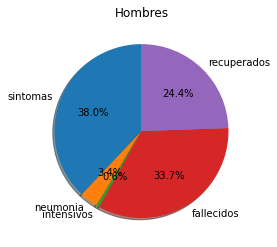

------------- Histograma---------


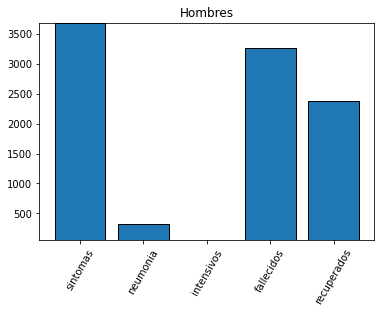

*************************************
El total de mujeres fue:  5851


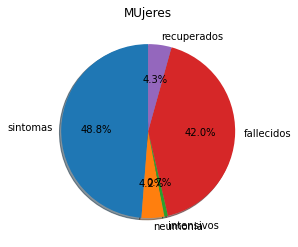

------------- Histograma---------


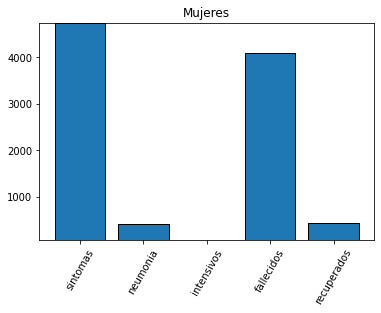

In [269]:
print("*************************************")
totalh=sum(HOMBRES.values())
print("El total de hombres fue: ",totalh)
turistas = [msto, neuto, inteto, fato, reto]
paises = ['sintomas','neumonia','intensivos','fallecidos','recuperados']
plt.pie(turistas, labels=paises,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Hombres')
plt.show()

print('------------- Histograma---------')
fechas = ['sintomas','neumonia','intensivos','fallecidos','recuperados']
primas = [msto, neuto, inteto, fato, reto]
plt.bar(range(5), primas, edgecolor='black')
plt.xticks(range(5), fechas, rotation=60)
plt.title("Hombres")
plt.ylim(min(primas)-1, max(primas)+1)
plt.show()


print("*************************************")
totalm=sum(MUJERES.values())
print("El total de mujeres fue: ",totalm)
turistas = [mstof, neutof, intetof, fatof, retof]
paises = ['sintomas','neumonia','intensivos','fallecidos','recuperados']
plt.pie(turistas, labels=paises,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('MUjeres')
plt.show()

print('------------- Histograma---------')
fechas = ['sintomas','neumonia','intensivos','fallecidos','recuperados']
primas = [mstof, neutof, intetof, fatof, retof]
plt.bar(range(5), primas, edgecolor='black')
plt.xticks(range(5), fechas, rotation=60)
plt.title("Mujeres")
plt.ylim(min(primas)-1, max(primas)+1)
plt.show()

In [268]:
medads=sum(ADULTOSSMM.values())
medadn=sum(NEUMOMM.values())
medadi=sum(INTENMM.values())
medadf=sum(FALLECIDOSMM.values())
medadr=sum(RECUPERADOMM.values())
#---------
medadsf=sum(ADULTOSSMF.values())
medadnf=sum(NEUMOFM.values())
medadif=sum(INTENFM.values())
medadff=sum(FALLECIDOSFM.values())
medadrf=sum(RECUPERADOFM.values())

sinni=(medads+medadsf)
neuni=(medadn+medadnf)
intni=(medadi+medadif)
falni=(medadf+medadff)
recni=(medadr+medadrf)

#***********************************
jovs=sum(ADULTOSSJM.values())
jovn=sum(NEUMOMJ.values())
jovi=sum(INTENMJ.values())
jovf=sum(FALLECIDOSMJ.values())
jovr=sum(RECUPERADOMJ.values())
#---------
jovsf=sum(ADULTOSSJF.values())
jovnf=sum(NEUMOFJ.values())
jovif=sum(INTENFJ.values())
jovff=sum(FALLECIDOSFJ.values())
jovrf=sum(RECUPERADOFJ.values())

sinjo=(jovs+jovsf)
neujo=(jovn+jovnf)
intjo=(jovi+jovif)
faljo=(jovf+jovff)
recjo=(jovr+jovrf)

#********************************
ters=sum(ADULTOSSTM.values())
tern=sum(NEUMOMT.values())
teri=sum(INTENMT.values())
terf=sum(FALLECIDOSMT.values())
terr=sum(RECUPERADOMT.values())
#---------
tersf=sum(ADULTOSSTF.values())
ternf=sum(NEUMOFT.values())
terif=sum(INTENFT.values())
terff=sum(FALLECIDOSFT.values())
terrf=sum(RECUPERADOFT.values())

sinte=(ters+tersf)
neute=(tern+ternf)
intte=(teri+terif)
falte=(terf+terff)
recte=(terr+terrf)

totalnin=msinto+neumo+inte+rec+fal+msintof+neumof+intef+recf+falf
totaljov=msinto1+neumo1+inte1+rec1+fal1+msinto1f+neumo1f+inte1f+rec1f+fal1f
totalte=msinto2+neumo2+inte2+rec2+fal2+msinto2f+neumo2f+inte2f+rec2f+fal2f

print('{:^3}{:^15}{:^20}{:^15}{:^20}{:^15}{:^20}'.format('Categoria','Total', 'Sintomas' ,'Neumonia', 'Intensivo', 'Fallecieron',
                                             'Curados'))
print('{:^3}{:^23}{:^13}{:^17}{:^20}{:^15}{:^22}'.format('Ninos',totalnin,sinni,neuni,intni,falni,recni))
print('{:^3}{:^19}{:^16}{:^18}{:^16}{:^18}{:^20}'.format('Jovenes',totaljov,sinjo,neujo,intjo,faljo,recjo))
print('{:^5}{:^20}{:^16}{:^18}{:^16}{:^18}{:^19}'.format('T_edad',totalte,sinte,neute,intte,falte,recte))

Categoria     Total           Sintomas         Neumonia         Intensivo        Fallecieron        Curados       
Ninos         2267               102             4                 2                90                2069         
Jovenes       9503              4598             427               68              3987               423         
T_edad        7674              3733             307               50              3281               303        
